# Visualização e análise de dados de turismo de Maceió

Os dados utilizados nas análises e visualizações a seguir foram retirados do observatório de turismo de maceió

http://observatorioturismo.maceio.al.gov.br/indicadores-hotelaria/

## HOTELARIA
Colhemos também periodicamente uma amostra de números da hotelaria através da Associação Brasileira da Indústria de Hotéis em Alagoas - ABIH, para acompanhamento da Taxa de Ocupação Hoteleira de Maceió.
Os dados abordados nos gráficos a seguir é uma análise do histórico da média mensal e anual da Taxa de Ocupação Hoteleira a partir de 2012 até os dias atuais.

Dados atualizados no terceiro trimestre de 2018

## Forecasting & Séries temporais

Forecasting é uma técnica que busca aprender padrões em dados do passado com o objetivo de prever essa informação no futuro. 
Essa abordagem é útil em diferentes cenários, tais como: prever fluxo de venda, valor de ativos, consumo elétrico e etc.

No exemplo a seguir, iremos observar como a movimentação de passageiros varia com o passar do tempo. Para isso temos uma sequência de datas e o valor da movimentação nessas respectivas datas. Essa estrutura
também pode ser chamada série temporal. Através da série temporal será possível entender o comportamento e prever qual seria a movimentação dos passageiros em datas futuras. A possibilidade de prever tal movimentação permite
que as decisões sejam tomadas de forma estratégica aproveitando momentos de fluxo de menor para realizar promoções e de maior fluxo pra explorar serviços relacionados.

## Prophet
O Prophet é uma solução open-source desenvolvida pelo facebook para realizar previsões em séries temporais de forma simples. O modelo que o Prophet utiliza para realizar as previsões utiliza três componentes.

y(t) = g(t) + s(t) + h(t) + e<sub>t</sub>

onde:
- **g** é a função de tendência, que modela mudanças não periódicas nas séries temporais

- **s** é a função de sazonalidade, que modela mudanças periódias nas séries

- **h** representa os efeitos dos feriados nas séries

- **e<sub>t</sub>** representa o erro

Vale a pena ressaltar que é possível extender o modelo e adicionar novos componentes. Para entender melhor sobre os componentes recomendo que leiam o artigo original. A referência está no final deste artigo.

### Pré-requisitos

#### Requisitos do sistema 
É recomndado utilizar uma máquina com no mínimo 2GB de memória livre.

#### Bibliotecas
- numpy
- cython
- pandas
- pystan
- fbprophet
- matplotlib

In [1]:
# Comando para instalar os requisitos
# !pip install numpy
# !pip install pandas
# !pip install cython
# !pip install matplotlib
# !pip install pystan --no-cache-dir --no-binary :all:
# !pip install fbprophet --no-cache-dir --no-binary :all:

In [1]:
import pandas as pd

# flattening list    
flatten = lambda l: [item for sublist in l for item in sublist]

# 
to_percentage = lambda l: [ float(str(item).replace("%",""))/100 for item in l]

# importando dataset
df = pd.read_csv("data-v1/indicadores-hotelaria.csv")
df

,MES,2012,2013,2014,2015,2016,2017,2018
0,01 - JAN,88.06%,87.90%,83.36%,86.22%,86.38%,85.30%,88.00%
1,02 - FEV,68.49%,73.75%,71.63%,68.88%,76.08%,74.34%,80.00%
2,03 - MAR,72.08%,76.79%,78.00%,68.82%,73.02%,74.61%,81.00%
3,04 - ABR,65.59%,67.23%,71.31%,62.54%,63.19%,64.13%,71.00%
4,05 - MAI,53.03%,61.70%,57.00%,56.55%,57.12%,56.83%,64.00%
5,06 - JUN,55.81%,55.79%,41.75%,47.06%,48.77%,53.30%,55.00%
6,07 - JUL,71.65%,79.38%,60.32%,71.96%,76.22%,71.89%,76.00%
7,08 - AGO,57.96%,63.68%,57.59%,59.31%,64.14%,64.04%,66.00%
8,09 - SET,66.01%,67.13%,63.64%,65.11%,67.00%,70.14%,77.00%
9,10 - OUT,68.48%,77.53%,69.90%,74.32%,72.71%,75.85%,NaN


In [2]:
# Pré processamento de dados

df_transposed = df.transpose()
df_transposed.loc['MES_NUMBERS'] = [ x[0:2] for x in df_transposed.loc['MES']]
dates = [ year + "-" + df_transposed.loc['MES_NUMBERS']  for year in df.columns[1:].values]
dates = flatten(dates)
percentages = df_transposed.drop(['MES','MES_NUMBERS']).values.flatten()
percentages = to_percentage(percentages)
percentages

[0.8806,
 0.6849,
 0.7208,
 0.6559,
 0.5303,
 0.5581,
 0.7165,
 0.5796,
 0.6601,
 0.6848000000000001,
 0.7404999999999999,
 0.7378,
 0.879,
 0.7375,
 0.7679,
 0.6723,
 0.617,
 0.5579,
 0.7938,
 0.6368,
 0.6713,
 0.7753,
 0.7306,
 0.7524,
 0.8336,
 0.7162999999999999,
 0.78,
 0.7131000000000001,
 0.57,
 0.4175,
 0.6032,
 0.5759000000000001,
 0.6364,
 0.6990000000000001,
 0.7045999999999999,
 0.7248,
 0.8622,
 0.6888,
 0.6881999999999999,
 0.6254,
 0.5655,
 0.4706,
 0.7195999999999999,
 0.5931000000000001,
 0.6511,
 0.7432,
 0.6511,
 0.7372,
 0.8637999999999999,
 0.7608,
 0.7302,
 0.6319,
 0.5711999999999999,
 0.4877,
 0.7622,
 0.6414,
 0.67,
 0.7271,
 0.7090000000000001,
 0.7476,
 0.853,
 0.7434000000000001,
 0.7461,
 0.6413,
 0.5683,
 0.5329999999999999,
 0.7189,
 0.6404000000000001,
 0.7014,
 0.7585,
 0.76,
 0.78,
 0.88,
 0.8,
 0.81,
 0.71,
 0.64,
 0.55,
 0.76,
 0.66,
 0.77,
 nan,
 nan,
 nan]

In [3]:
# Criando dataset no format esperado pelo prophet

ts_df = pd.DataFrame({'ds': dates, 'y': percentages})
ts_df['ds'] = pd.DatetimeIndex(ts_df['ds'])
ts_df.head(10)

,ds,y
0,2012-01-01,0.8806
1,2012-02-01,0.6849
2,2012-03-01,0.7208
3,2012-04-01,0.6559
4,2012-05-01,0.5303
5,2012-06-01,0.5581
6,2012-07-01,0.7165
7,2012-08-01,0.5796
8,2012-09-01,0.6601
9,2012-10-01,0.6848


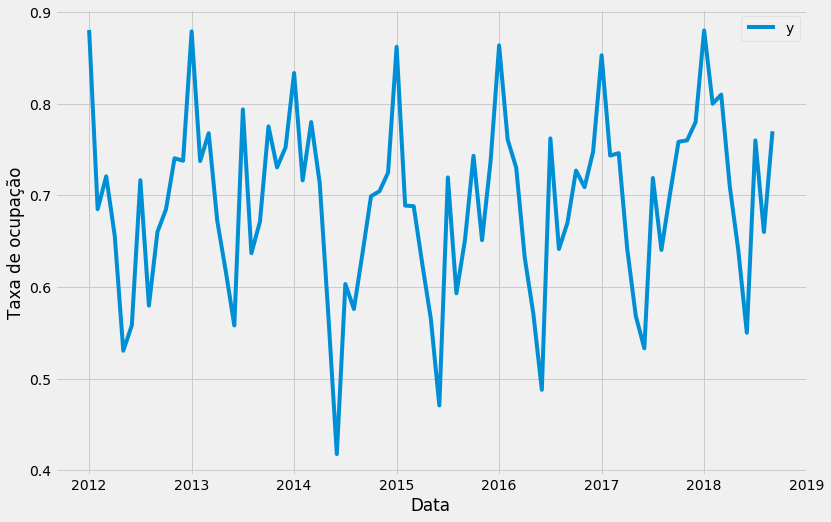

In [4]:
# Visualizando dados

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ax = ts_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Taxa de ocupação')
ax.set_xlabel('Data')

plt.show()

In [5]:
# Treinando modelo

from fbprophet import Prophet
model = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
model.fit(ts_df)

In [6]:
# Gerando previsões para os pŕoximos 12 meses
future = model.make_future_dataframe(periods=12, freq = 'm')
future.tail()

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2019-07-31,0.675990,0.622064,0.731043
92,2019-08-31,0.809227,0.756937,0.866078
93,2019-09-30,0.892590,0.839781,0.948032
94,2019-10-31,0.717850,0.663269,0.768680
95,2019-11-30,0.842837,0.789785,0.897472


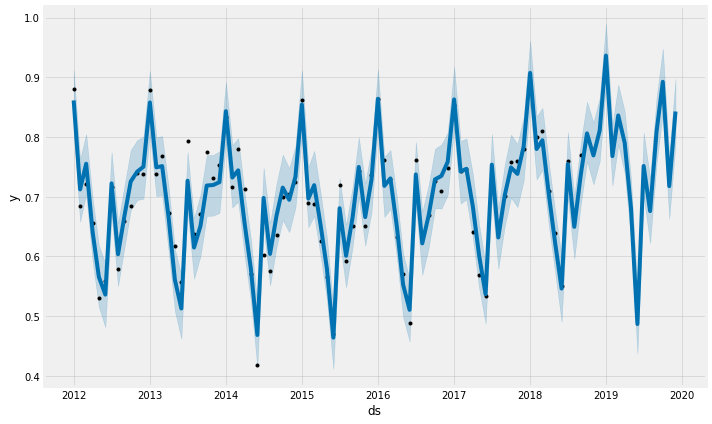

In [7]:
# Visualizando novos
model.plot(forecast,uncertainty=True)
plt.show()

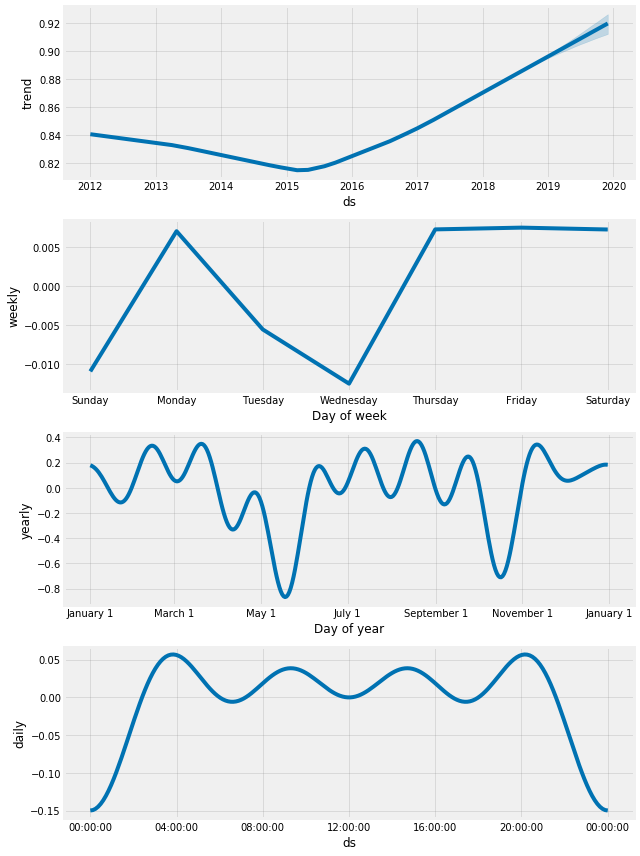

In [8]:
# Exibindo tendências
model.plot_components(forecast)
plt.show()

## Referências

- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
- https://github.com/urgedata/pythondata/blob/master/fbprophet/fbprophet_part_one.ipynb
- https://facebook.github.io/prophet/docs/quick_start.html#python-api
- https://peerj.com/preprints/3190/